# Linear Regression for house price prediction

1. Linear regression(with normal equation and iterativee optimisation procedure)
2. Polynomial regression
3. Regularised regression model - ridge and lasso 

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import loguniform
from scipy.stats import uniform

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline

## Common setup

In [4]:
np.random.seed(306)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

## Data loading and splitting

In [6]:
#fetch dataset
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

# train-test split
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)
# train --> train + dev split
train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels, random_state=42)

## Linear Regression with normal equation

In [7]:
lin_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                                ("lin_reg", LinearRegression())])

lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

lin_reg_train_error = -1 * lin_reg_cv_results['train_score'] 
lin_reg_test_error = -1 * lin_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
        f"{lin_reg_train_error.mean():.3f} +/- {lin_reg_train_error.std():.3f}")

print(f"Mean absolute error of linear regression model on the test set:\n"
        f"{lin_reg_test_error.mean():.3f} +/- {lin_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.530 +/- 0.002
Mean absolute error of linear regression model on the test set:
0.527 +/- 0.008


## Linear regression with SGD

In [8]:
sgd_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                        ("sgd", SGDRegressor(max_iter=np.ceil(1e6/com_train_features.shape[0]),
                                            early_stopping=True,
                                            eta0 = 1e-4,
                                            tol=1e-5,
                                            learning_rate='constant',
                                            validation_fraction=0.1,
                                            n_iter_no_change=5,
                                            average=10,
                                            random_state=42))])

sgd_reg_cv_results = cross_validate(sgd_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

sgd_reg_train_error = -1 * sgd_reg_cv_results['train_score'] 
sgd_reg_test_error = -1 * sgd_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
        f"{sgd_reg_train_error.mean():.3f} +/- {sgd_reg_train_error.std():.3f}")

print(f"Mean absolute error of linear regression model on the test set:\n"
        f"{sgd_reg_test_error.mean():.3f} +/- {sgd_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.534 +/- 0.013
Mean absolute error of linear regression model on the test set:
0.530 +/- 0.010


## Polynomial regression

In [9]:
poly_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                            ("feature_scaling", StandardScaler()),
                            ("lin_reg", LinearRegression())])

poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

poly_reg_train_error = -1 * poly_reg_cv_results['train_score'] 
poly_reg_test_error = -1 * poly_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
        f"{poly_reg_train_error.mean():.3f} +/- {poly_reg_train_error.std():.3f}")

print(f"Mean absolute error of linear regression model on the test set:\n"
        f"{poly_reg_test_error.mean():.3f} +/- {poly_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.461 +/- 0.003
Mean absolute error of linear regression model on the test set:
0.485 +/- 0.030


Let's use only inteeraction terms in polynomial regression.

In [10]:
poly_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2, interaction_only=True)),
                            ("feature_scaling", StandardScaler()),
                            ("lin_reg", LinearRegression())])

poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

poly_reg_train_error = -1 * poly_reg_cv_results['train_score'] 
poly_reg_test_error = -1 * poly_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
        f"{poly_reg_train_error.mean():.3f} +/- {poly_reg_train_error.std():.3f}")

print(f"Mean absolute error of linear regression model on the test set:\n"
        f"{poly_reg_test_error.mean():.3f} +/- {poly_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.478 +/- 0.003
Mean absolute error of linear regression model on the test set:
0.497 +/- 0.024


Let's figure out which degree polynomial is best suited

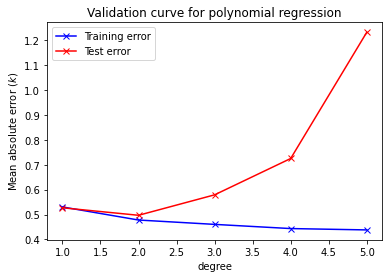

In [12]:

degree = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(
                                            poly_reg_pipeline, com_train_features, com_train_labels, param_name="poly__degree",
                                            param_range=degree, cv=cv, scoring="neg_mean_absolute_error",
                                            n_jobs=2)

train_errors, test_errors = -train_scores, -test_scores

plt.plot(degree, train_errors.mean(axis=1), 'b-x', label='Training error')
plt.plot(degree, test_errors.mean(axis=1), 'r-x', label='Test error')
plt.legend()
plt.xlabel("degree")
plt.ylabel("Mean absolute error ($k$)")
_ = plt.title("Validation curve for polynomial regression")

Best degree = 2

## Ridge regression

In [13]:
ridge_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2, interaction_only=True)),
                            ("feature_scaling", StandardScaler()),
                            ("ridge", Ridge(alpha=0.5))])

ridge_reg_cv_results = cross_validate(ridge_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

ridge_reg_train_error = -1 * ridge_reg_cv_results['train_score'] 
ridge_reg_test_error = -1 * ridge_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
        f"{ridge_reg_train_error.mean():.3f} +/- {ridge_reg_train_error.std():.3f}")

print(f"Mean absolute error of linear regression model on the test set:\n"
        f"{ridge_reg_test_error.mean():.3f} +/- {ridge_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.490 +/- 0.003
Mean absolute error of linear regression model on the test set:
0.493 +/- 0.006


# HPT for ridge regularisation rate

In [14]:
alpha_list = np.logspace(-4, 0, num=20)
ridge_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                            ("feature_scaling", StandardScaler()),
                            ("ridge_cv", RidgeCV(alphas=alpha_list,
                                                cv=cv,
                                                scoring="neg_mean_absolute_error"))])

ridge_reg_cv_results = ridge_reg_pipeline.fit(com_train_features, com_train_labels)

print("The score with the best alpha is: ",
        f"{ridge_reg_cv_results[-1].best_score_:.3f}")

print("The error with the best alpha is: ",
        f"{-ridge_reg_cv_results[-1].best_score_:.3f}")

The score with the best alpha is:  -0.473
The error with the best alpha is:  0.473


In [18]:
print("The best value of alpha is: ", ridge_reg_cv_results[-1].alpha_)

The best value of alpha is:  0.007847599703514606


## `RidgeCV` with cross validation
exercise

## Ridge HPT through `GridSearchCV`

In [21]:
ridge_grid_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                            ("feature_scaling", StandardScaler()),
                            ("ridge", Ridge())])

param_grid = {'poly__degree': (1,2,3),
            'ridge__alpha': np.logspace(-4, 0, num=20)}

ridge_grid_search = GridSearchCV(ridge_grid_pipeline,
                                param_grid=param_grid,
                                n_jobs=2,
                                cv=cv,
                                scoring="neg_mean_absolute_error",
                                return_train_score=True)

ridge_grid_search.fit(com_train_features, com_train_labels)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [24]:
mean_train_error = -1 * ridge_grid_search.cv_results_['mean_train_score'][ridge_grid_search.best_index_]
mean_test_error = -1 * ridge_grid_search.cv_results_['mean_test_score'][ridge_grid_search.best_index_]
std_train_error = -1 * ridge_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]
std_test_error = -1 * ridge_grid_search.cv_results_['std_test_score'][ridge_grid_search.best_index_]

print(f"Best Mean absolute error of polynomial ridge regression model on the train set:\n"
        f"{mean_train_error.mean():.3f} +/- {std_train_error.std():.3f}")

print(f"Mean absolute error of polynomial ridge regression model on the test set:\n"
        f"{mean_test_error.mean():.3f} +/- {std_test_error.std():.3f}")

Best Mean absolute error of polynomial ridge regression model on the train set:
0.463 +/- 0.000
Mean absolute error of polynomial ridge regression model on the test set:
0.474 +/- 0.000


In [25]:
print("The best parameter value is:", ridge_grid_search.best_params_)

The best parameter value is: {'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}
